## A decision boundary for CART, Random Forest, SVR Tree, SPBaDF and SPBoDF

To demostrate the performance of the proposed SPBaDF and SPBoDF, Let us create a spiral dataset

In [1]:
import numpy as np

### Lets create two function to generate the spiral dataset and plot the decision boundary

In [2]:
def generate_spiral_data(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.randn(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.randn(n_points,1) * noise
    return np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y)))), np.hstack((np.zeros(n_points), np.ones(n_points)))

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

In [3]:
X, y = generate_spiral_data(500)

### lets check the shape of the dataset

In [4]:
X.shape

(1000, 2)

### Lets take a look at data

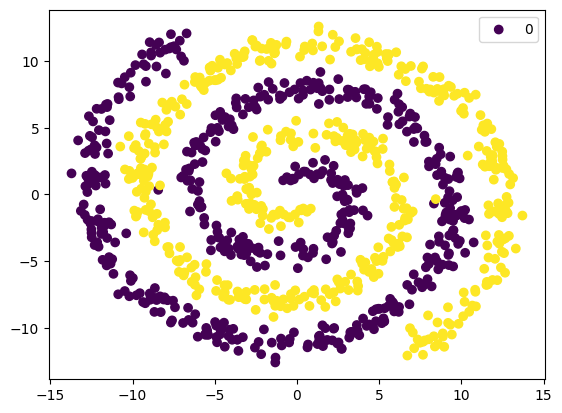

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(['0', '1'])
plt.show()

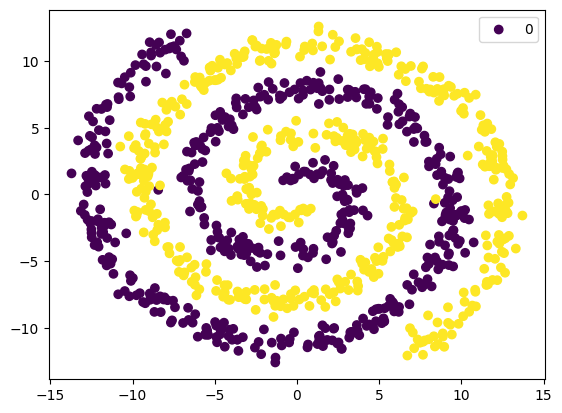

In [6]:

plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(['0', '1'])
plt.show()

To make the dataset imbalanced_spdf, we will create a function which takes 1s and 0s ratio as input and returns the dataset

In [7]:
def make_imbalance_data(X ,y , ratio):
    np.random.seed(42)
    assert ratio > 0 and ratio < 1, 'Ratio should be between 0 and 1'
    X_resampled = []
    y_resampled = []
    for Xi,yi in zip(X, y):
        if yi == 1:
            if np.random.rand() < ratio:
                X_resampled.append(Xi)
                y_resampled.append(yi)
        else:
            X_resampled.append(Xi)
            y_resampled.append(yi)
    print(f"Original data shape: {len(y)}, Resampled data shape: {len(y_resampled)}")
    print(f"1s in resampled data: {y_resampled.count(1)}, 0s in resampled data: {y_resampled.count(0)}")
    return np.array(X_resampled), np.array(y_resampled)
    

In [8]:
X_imb, y_imb = make_imbalance_data(X, y, 0.1)

Original data shape: 1000, Resampled data shape: 565
1s in resampled data: 65, 0s in resampled data: 500


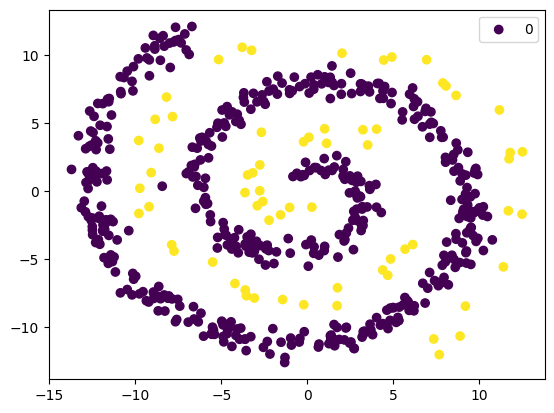

In [10]:

plt.scatter(X_imb[:,0], X_imb[:,1], c=y_imb)
plt.legend(['0', '1'])
plt.show()

### let's plot resampled data

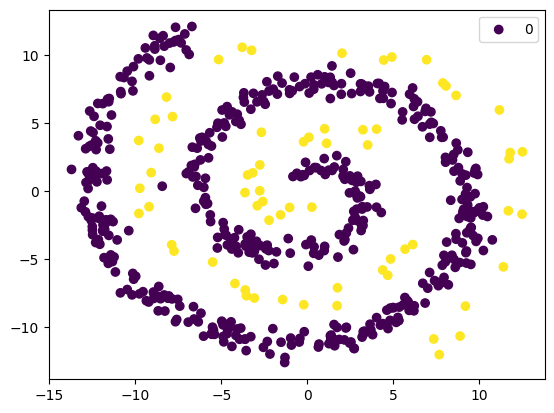

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X_imb[:,0], X_imb[:,1], c=y_imb)
plt.legend(['0', '1'])
plt.show()

### Let's Plot a mega plot where columns are different classifiers and rows are datset with different imbalance ratio

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

Original data shape: 1000, Resampled data shape: 531
1s in resampled data: 31, 0s in resampled data: 500
Original data shape: 1000, Resampled data shape: 565
1s in resampled data: 65, 0s in resampled data: 500
Original data shape: 1000, Resampled data shape: 614
1s in resampled data: 114, 0s in resampled data: 500
Original data shape: 1000, Resampled data shape: 654
1s in resampled data: 154, 0s in resampled data: 500


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

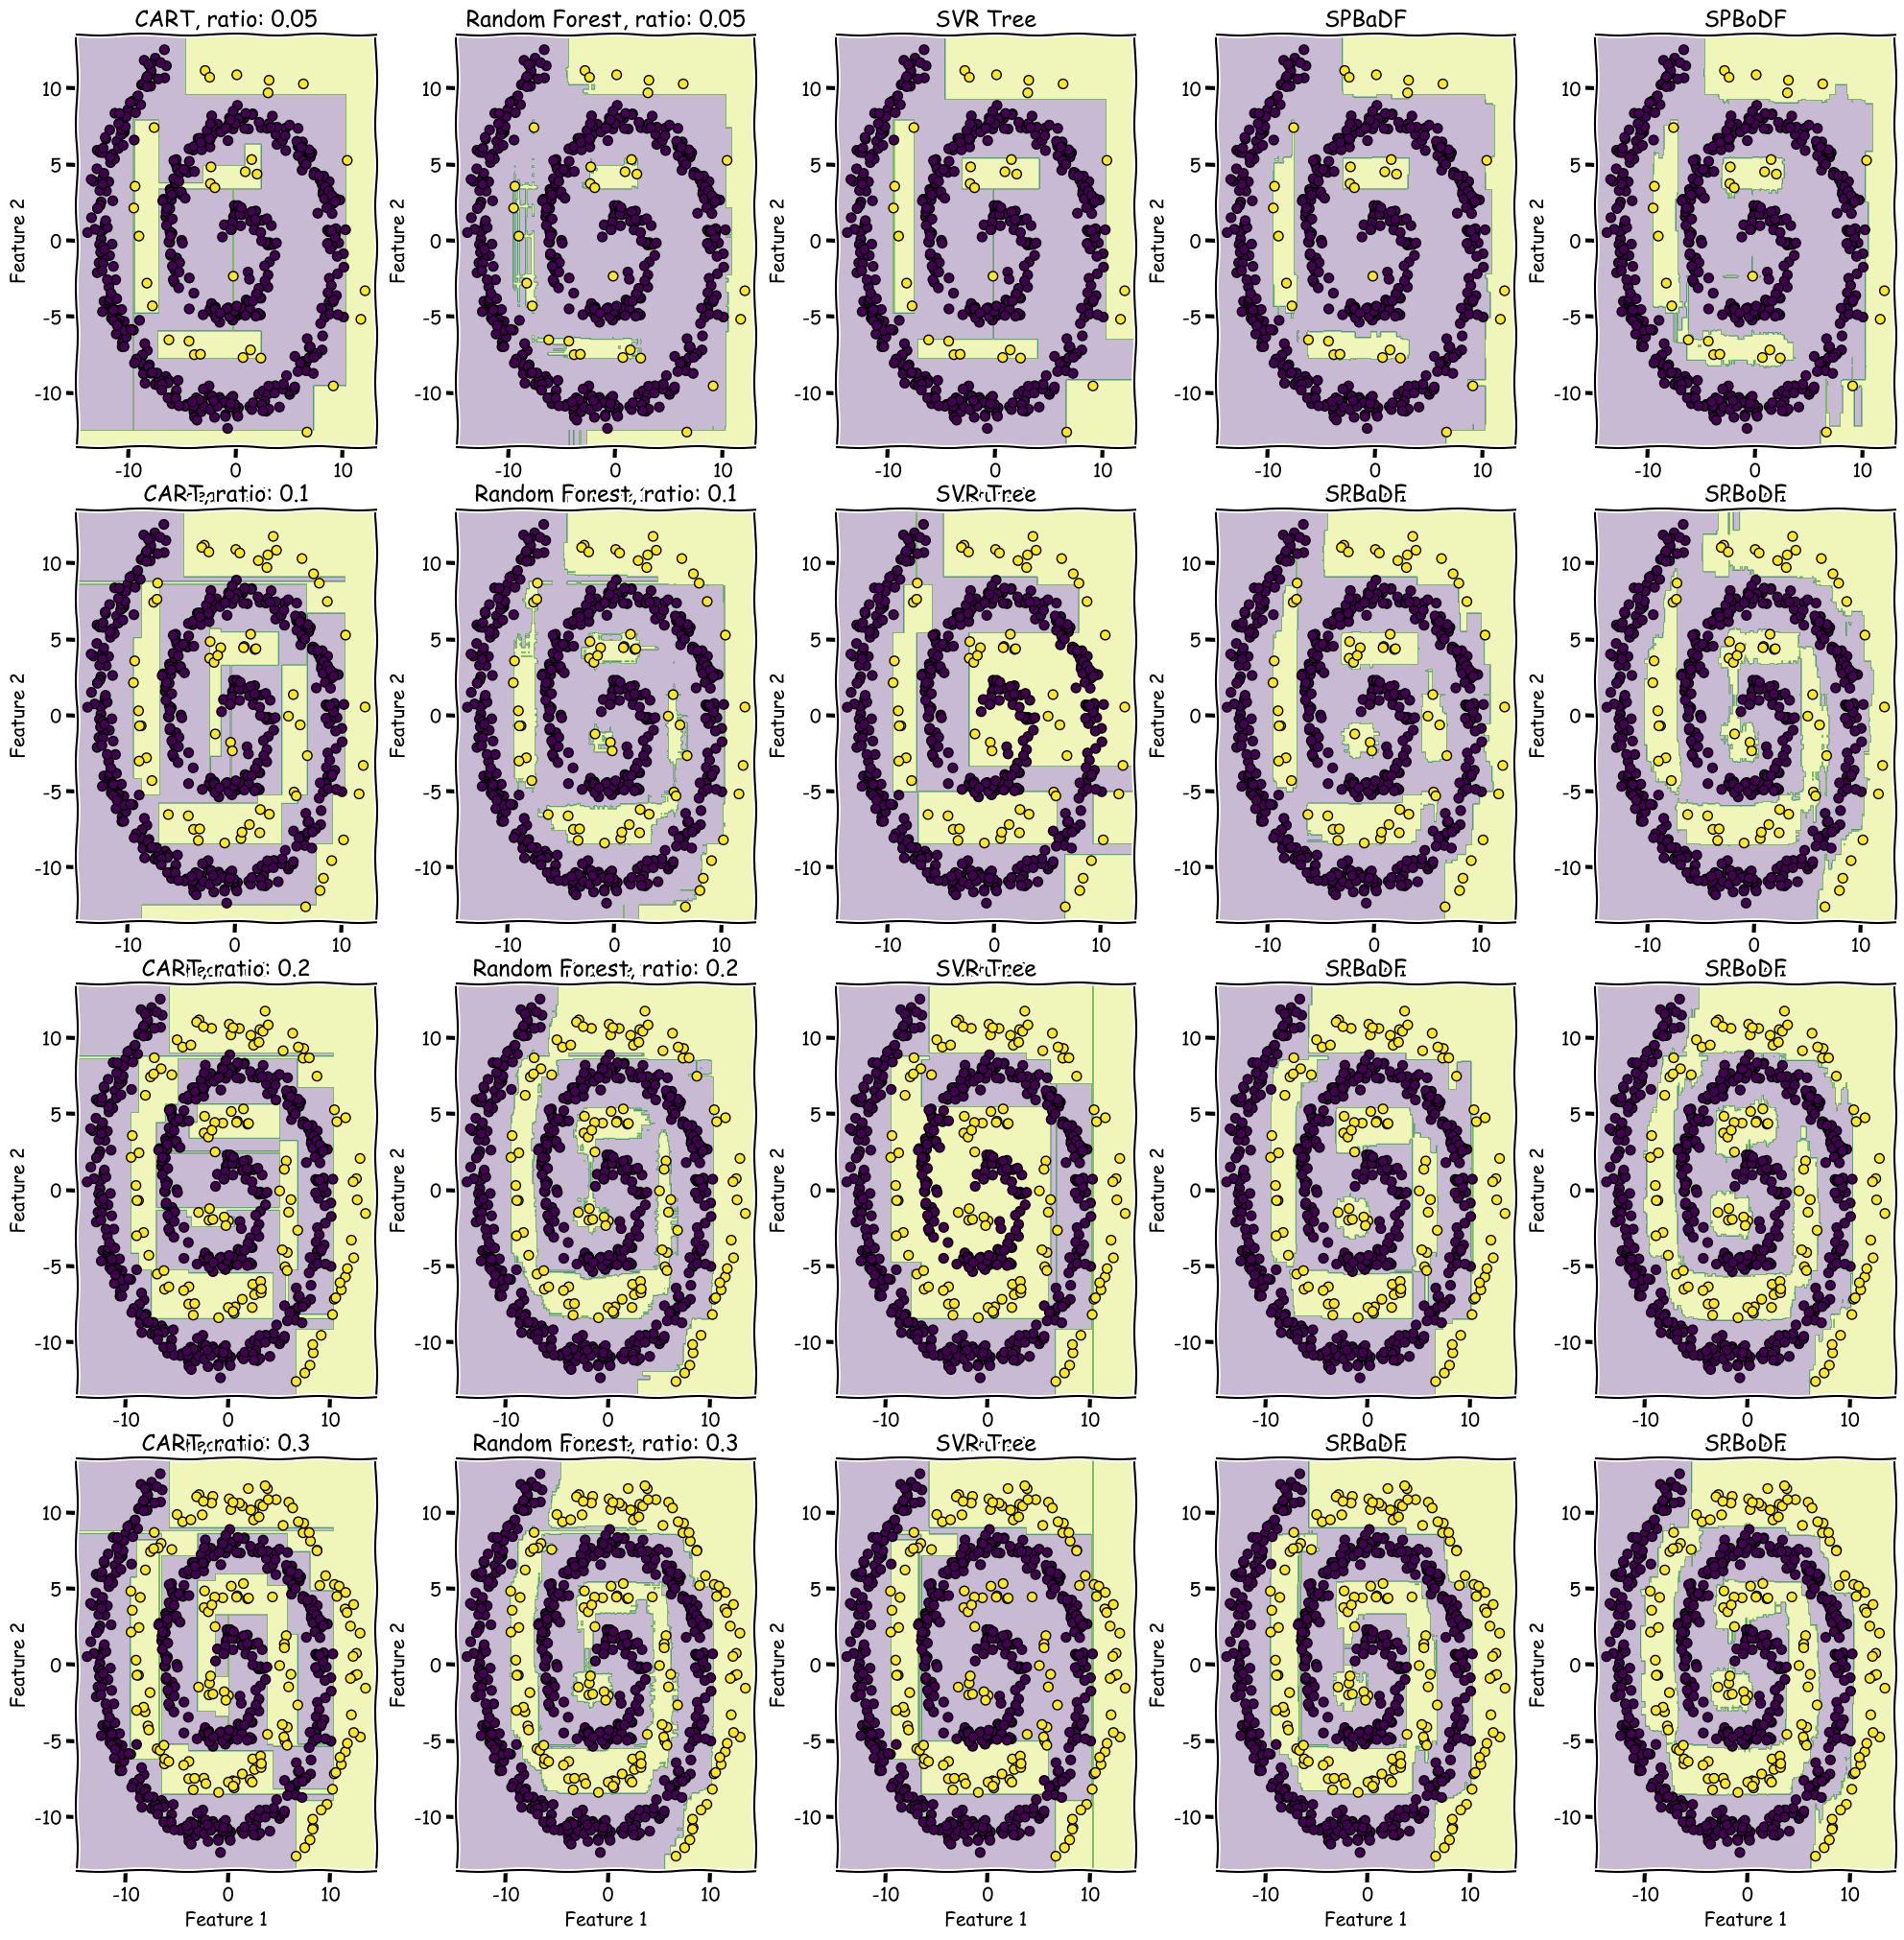

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imbalanced_spdf.tree import tree as SVR_Tree
from imbalanced_spdf.ensemble import SPBaDF, SPBoDF
imbalance_ratio = [0.05,0.1,0.2,0.3]
weight = [20, 10, 5, 3]


fig, axs = plt.subplots(4, 5, figsize=(20, 20))
plt.tight_layout()
for i, ratio in enumerate(imbalance_ratio):
    X_imb, y_imb = make_imbalance_data(X, y, ratio)
    ## CART
    clf = DecisionTreeClassifier()
    clf.fit(X_imb, y_imb)
    plot_decision_boundary(clf, X_imb, y_imb, axs[i, 0], f'CART, ratio: {ratio}')
    
    ## Random Forest
    clf = RandomForestClassifier()
    clf.fit(X_imb, y_imb)
    plot_decision_boundary(clf, X_imb, y_imb, axs[i, 1], f'Random Forest, ratio: {ratio}')
    
    ## SVR Tree
    clf = SVR_Tree()
    clf.fit_sv(X_imb, y_imb,weight=weight[i],pen = 0)
    plot_decision_boundary(clf, X_imb, y_imb, axs[i, 2], f'SVR Tree')
    
    ## SPBaDF
    clf = SPBaDF(weight=weight[i])
    clf.fit(X_imb, y_imb)
    plot_decision_boundary(clf, X_imb, y_imb, axs[i, 3], f'SPBaDF')
    
    ## SPBoDF
    clf = SPBoDF(weight=weight[i])
    clf.fit(X_imb, y_imb)
    plot_decision_boundary(clf, X_imb, y_imb, axs[i, 4], f'SPBoDF')
    

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imbalanced_spdf.tree import tree as SVR_Tree
from imbalanced_spdf.ensemble import SPBaDF, SPBoDF
imbalance_ratio = [0.05,0.1,0.2,0.3]
weight = [20, 10, 5, 3]

Original data shape: 1000, Resampled data shape: 565
1s in resampled data: 65, 0s in resampled data: 500


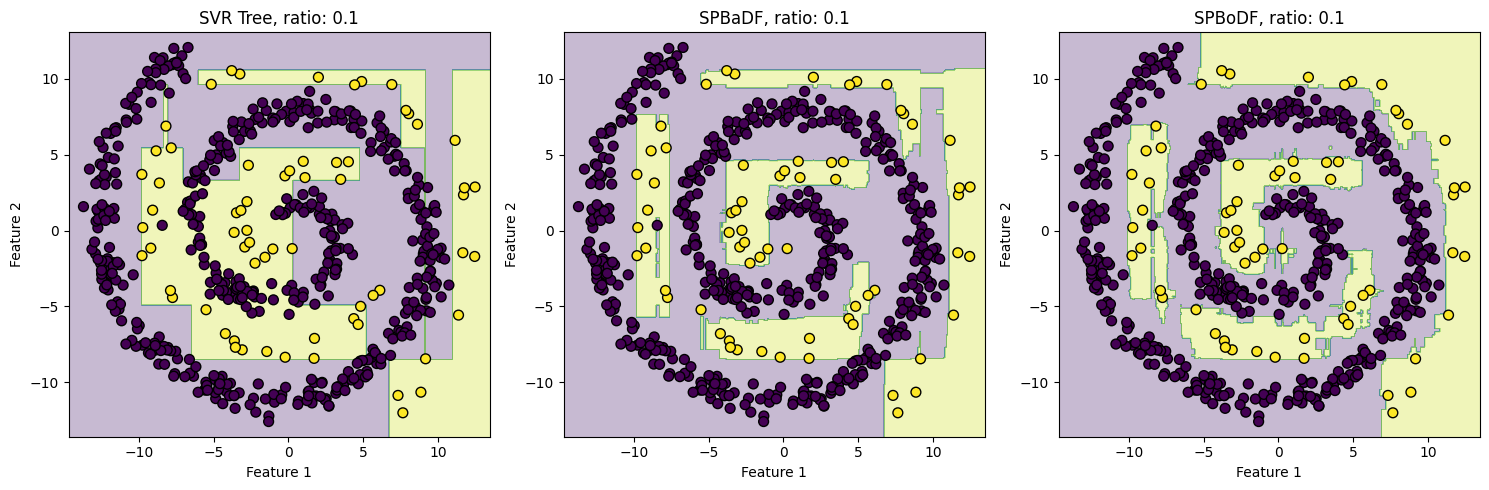

In [14]:
# plot 3 plot SVRTree , SPBaDF and SPBoDF with 0.1 imbalance ratio
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
X_imb, y_imb = make_imbalance_data(X, y, 0.1)
## SVR Tree
clf = SVR_Tree()
clf.fit_sv(X_imb, y_imb,weight=20,pen = 0)
plot_decision_boundary(clf, X_imb, y_imb, axs[0], f'SVR Tree, ratio: 0.1')

## SPBaDF
clf = SPBaDF(weight=20)
clf.fit(X_imb, y_imb)
plot_decision_boundary(clf, X_imb, y_imb, axs[1], f'SPBaDF, ratio: 0.1')

## SPBoDF
clf = SPBoDF(weight=20)
clf.fit(X_imb, y_imb)
plot_decision_boundary(clf, X_imb, y_imb, axs[2], f'SPBoDF, ratio: 0.1')
plt.tight_layout()
plt.show() 

### Let's plot Decision boundary for SVR Tree, SPBaDF and SPBoDF for different penality values, for imbalance ration 0.05

Original data shape: 1000, Resampled data shape: 565
1s in resampled data: 65, 0s in resampled data: 500


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

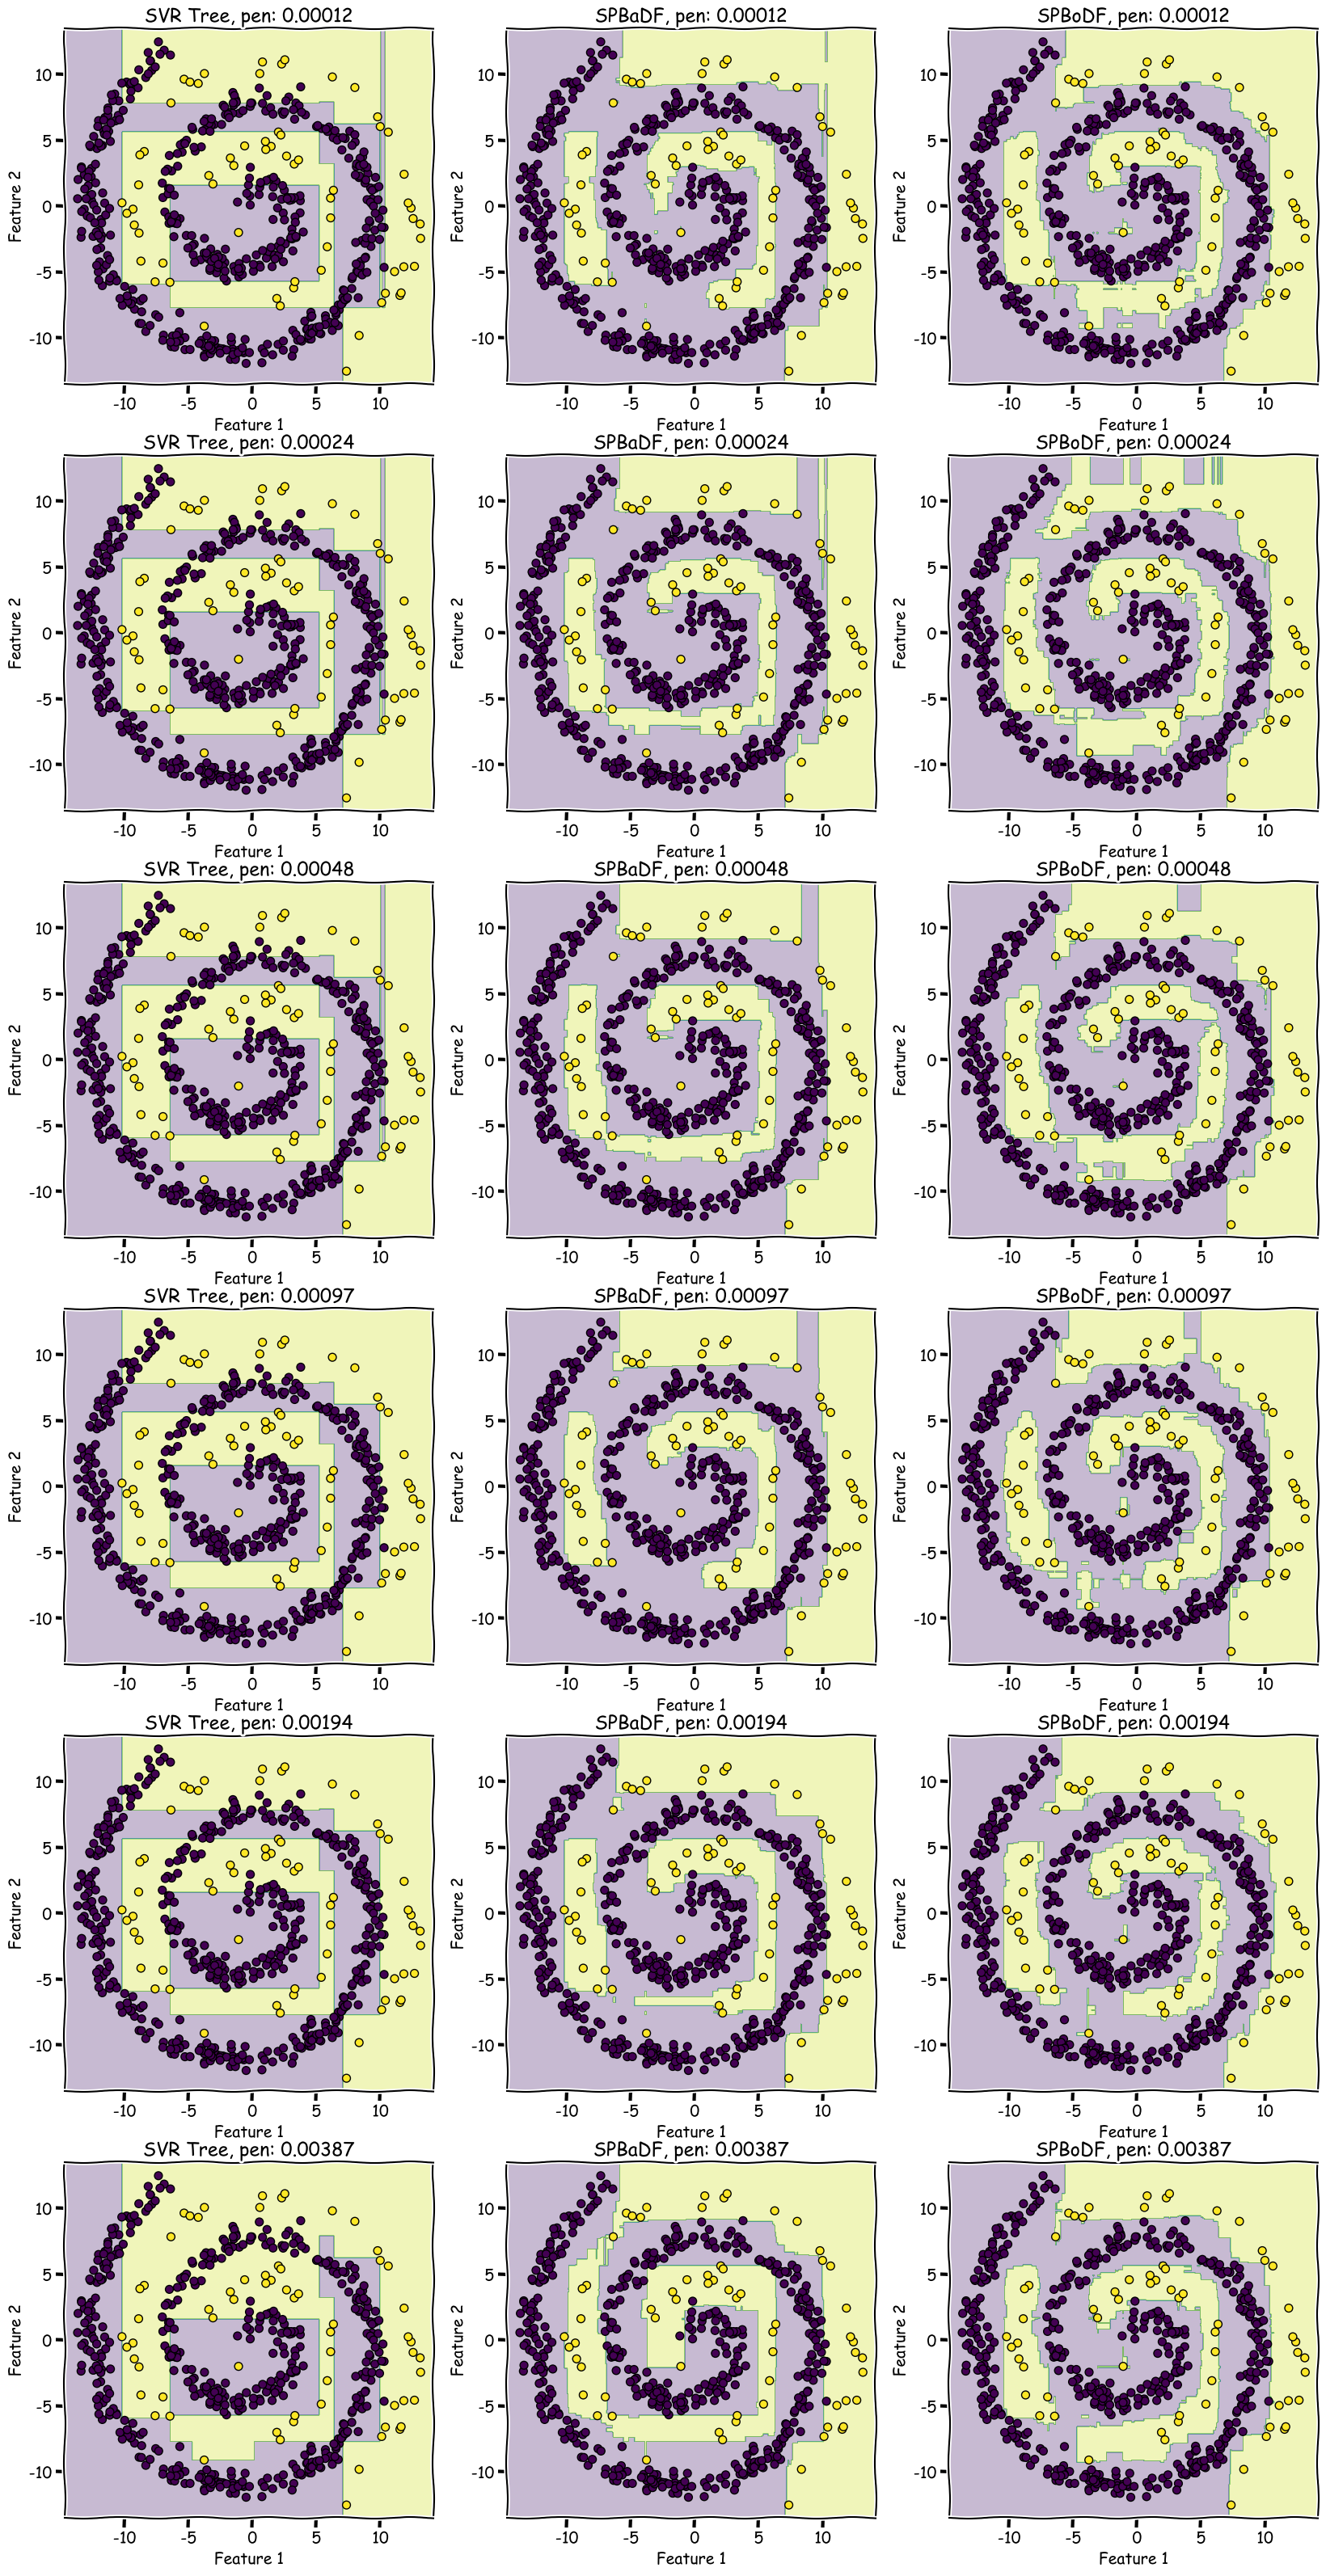

In [16]:
# 3 models 10 penalty ratio

fig, axs = plt.subplots(6, 3, figsize=(20, 40))

imbalance_ratio = 0.1
X_imb, y_imb = make_imbalance_data(X, y, imbalance_ratio)
n_sample = len(y_imb)

penalty_candidate = 2**(np.arange(6, dtype=float))*0.001*n_sample**(-1/3)

for i, pen in enumerate(penalty_candidate):
    ## SVR Tree
    clf = SVR_Tree()
    clf.fit_sv(X_imb, y_imb,weight=20,pen = pen)
    plot_decision_boundary(clf, X_imb, y_imb, axs[i, 0], f'SVR Tree, pen: {round(pen,5)}')
    
    ## SPBaDF
    clf = SPBaDF(weight=20,pen = pen)
    clf.fit(X_imb, y_imb)
    plot_decision_boundary(clf, X_imb, y_imb, axs[i, 1], f'SPBaDF, pen: {round(pen,5)}')
    
    ## SPBoDF
    clf = SPBoDF(weight=20,pen = pen)
    clf.fit(X_imb, y_imb)
    plot_decision_boundary(clf, X_imb, y_imb, axs[i, 2], f'SPBoDF, pen: {round(pen,5)}')

In [26]:
# plot some graph divide it by decision bundary and calculate surface area and volumn

## Rectangle quadrant

# Data generation process 1 if x1 > 0.5 and x2 < 0.5, square at [0,0], [0,1], [1,0], [1,1]
X = np.random.rand(1000,2)
y = np.zeros(1000)
# scale the to make it a square
max_x1 = X[:,0].max()
max_x2 = X[:,1].max()
min_x1 = X[:,0].min()
min_x2 = X[:,1].min()
X = (X - [min_x1, min_x2]) / [max_x1 - min_x1, max_x2 - min_x2]
noise = 0.1
for i, Xi in enumerate(X):
    if Xi[0] > 0.5 - noise and Xi[0] < 0.5 + noise and Xi[1] > 0.5 - noise and Xi[1] < 0.5 + noise:
        y[i] = 1

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

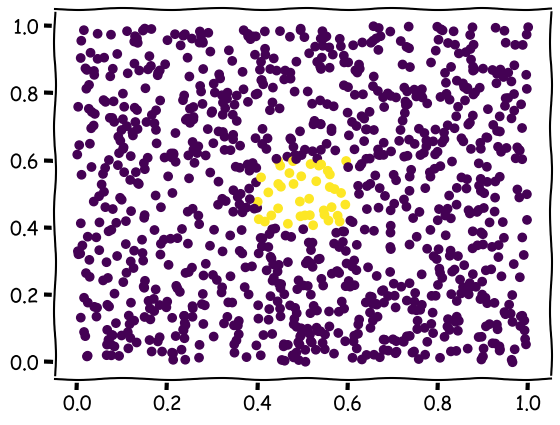

In [27]:
plt.scatter(X[:,0], X[:,1], c=y)

In [20]:
# sample data with 0.1 imbalance ratio
X_imb, y_imb = make_imbalance_data(X, y, 0.1)

Original data shape: 1000, Resampled data shape: 785
1s in resampled data: 27, 0s in resampled data: 758


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

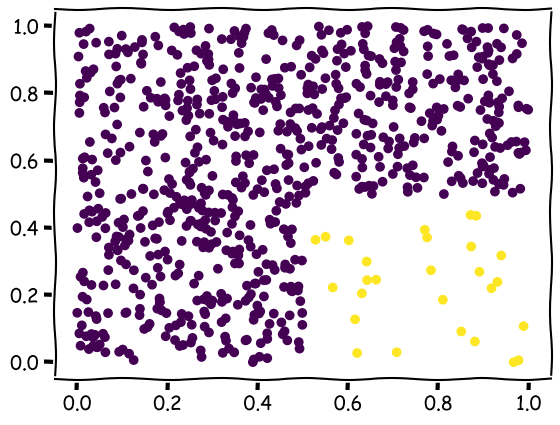

In [21]:
plt.scatter(X_imb[:,0], X_imb[:,1], c=y_imb)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

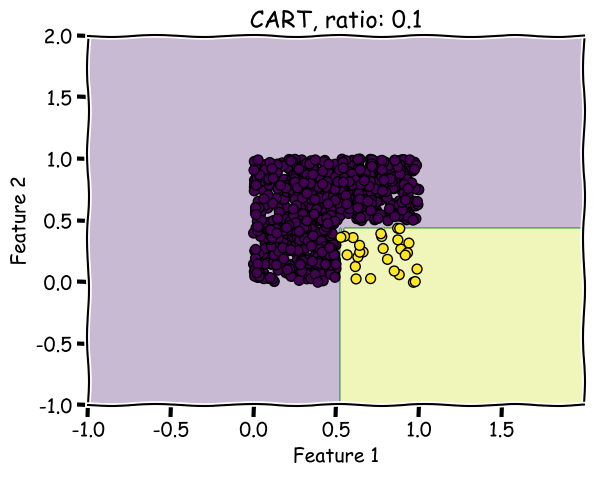

In [25]:
# show a decison boundary for CART
clf = RandomForestClassifier(max_depth=20)
clf.fit(X_imb, y_imb)
plot_decision_boundary(clf, X_imb, y_imb, plt.gca(), f'CART, ratio: 0.1')


Original data shape: 250, Resampled data shape: 140
1s in resampled data: 15, 0s in resampled data: 125


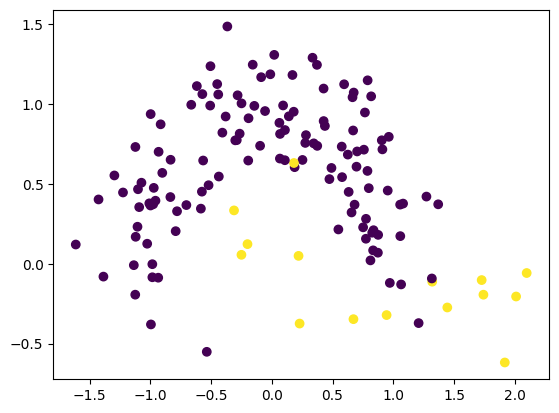

In [58]:
# use make classification to classsify the data
from sklearn.datasets import make_classification, make_moons
X, y = make_moons(n_samples=250,random_state=7, noise=0.24)
X , y = make_imbalance_data(X, y, 0.1)
plt.scatter(X[:,0], X[:,1], c=y)
# give the label according to the data y's value

plt.show()


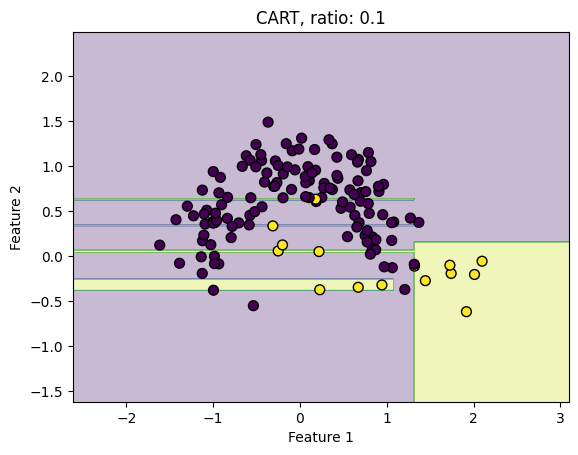

In [59]:
clf = DecisionTreeClassifier(random_state=27)
clf.fit(X, y)
plot_decision_boundary(clf, X, y, plt.gca(), f'CART, ratio: 0.1')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

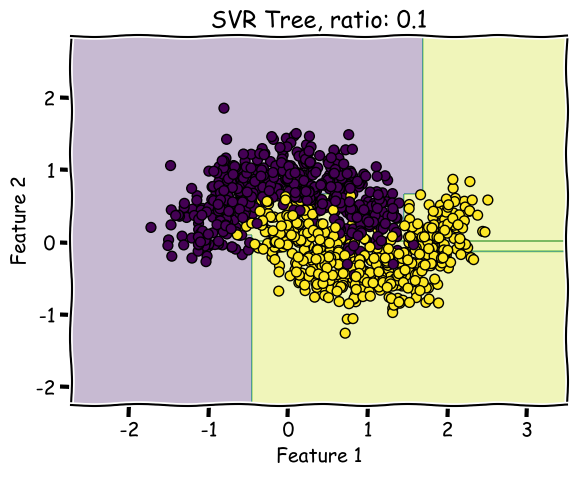

In [93]:
# SVR decision boundary
clf = SVR_Tree()
clf.fit_sv(X, y,weight=20,pen = 0.0)
plot_decision_boundary(clf, X, y, plt.gca(), f'SVR Tree, ratio: 0.1')


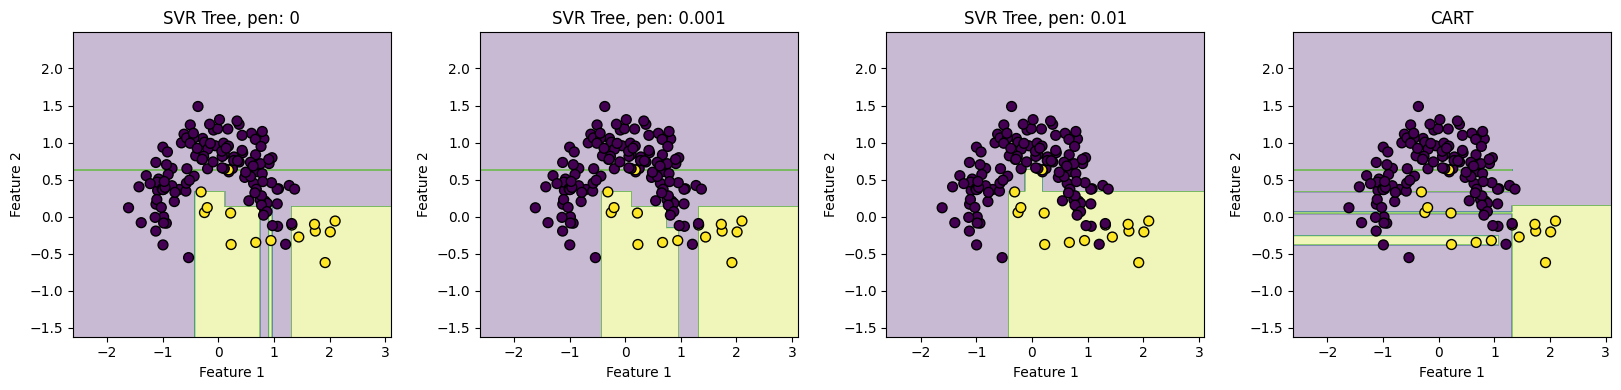

In [62]:
# plot SVR with different penality 0, 0.001, 0.01, 0.1, 0.5
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
penalty_candidate = [0, 0.001, 0.01]
plt.tight_layout()
clf = DecisionTreeClassifier(random_state=27)
clf.fit(X, y)
plot_decision_boundary(clf, X, y, plt.gca(), f'CART')
plt.tight_layout()
for i, pen in enumerate(penalty_candidate):
    ## SVR Tree
    clf = SVR_Tree()
    clf.fit_sv(X, y,weight=20,pen = pen)
    plot_decision_boundary(clf, X, y, axs[i], f'SVR Tree, pen: {pen}')